In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as scistat
pd.set_option('display.width', 62)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.2f}'.format

In [23]:
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

In [24]:
totvars = ['location', 'total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm']

demovars = ['population', 'pop_desity', 'median_age', 'gdp_per_capita', 'hosp_beds', 'hum_dev_ind']

In [25]:
covidtotalsonly = covidtotals.loc[:, totvars]
covidtotalsonly.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,231.00,231.00,231.00,231.00
mean,"3,351,598.58","30,214.20","206,177.79","1,261.78"
std,"11,483,211.82","104,778.94","203,858.10","1,314.98"
min,4.00,0.00,354.49,0.00
25%,"25,671.50",177.50,"21,821.86",141.18
50%,"191,496.00","1,937.00","133,946.25",827.05
75%,"1,294,286.00","14,150.00","345,689.83","1,997.51"
max,"103,436,829.00","1,127,152.00","763,475.44","6,507.66"


In [26]:
covidtotalsonly.quantile(np.arange(0.0, 1.1, 0.1), numeric_only=True)

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.00,4.00,0.00,354.49,0.00
0.10,"8,359.00",31.00,"3,138.57",32.88
0.20,"17,181.00",126.00,"10,885.74",105.30
0.30,"38,008.00",294.00,"35,834.60",210.51
0.40,"74,129.00",844.00,"86,126.24",498.79
0.50,"191,496.00","1,937.00","133,946.25",827.05
0.60,"472,755.00","4,384.00","220,429.37","1,251.30"
0.70,"1,041,111.00","9,646.00","293,737.44","1,697.57"
0.80,"1,877,065.00","21,218.00","416,608.11","2,271.68"
0.90,"5,641,992.00","62,288.00","512,388.40","3,155.94"


In [27]:
covidtotalsonly.skew(numeric_only=True)

total_cases       6.31
total_deaths      7.10
total_cases_pm    0.83
total_deaths_pm   1.25
dtype: float64

In [28]:
covidtotalsonly.kurtosis(numeric_only=True)

total_cases       47.08
total_deaths      61.73
total_cases_pm    -0.43
total_deaths_pm    1.26
dtype: float64

In [29]:
def testnorm(var, df):
    stat, p = scistat.shapiro(df[var])
    return p

print("total cases: %.5f" % testnorm("total_cases", covidtotalsonly))
print("total deaths: %.5f" % testnorm("total_deaths", covidtotalsonly))
print("total cases pm: %.5f" % testnorm("total_cases_pm", covidtotalsonly))
print("total deaths pm: %.5f" % testnorm("total_deaths_pm", covidtotalsonly))

total cases: 0.00000
total deaths: 0.00000
total cases pm: 0.00000
total deaths pm: 0.00000


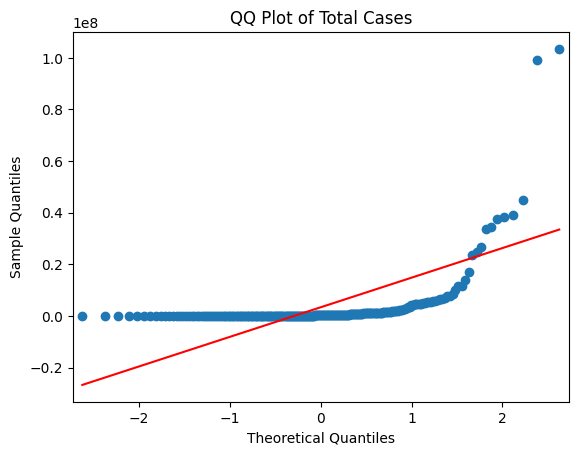

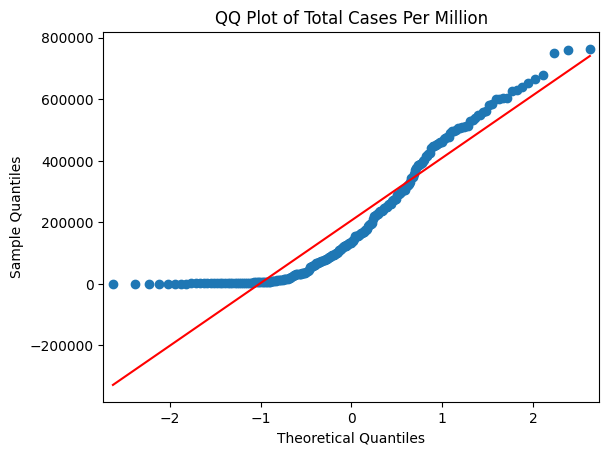

In [30]:
sm.qqplot(covidtotalsonly[['total_cases']].sort_values(['total_cases']), line='s')
plt.title("QQ Plot of Total Cases")
sm.qqplot(covidtotalsonly[['total_cases_pm']].sort_values(['total_cases_pm']), line='s')
plt.title("QQ Plot of Total Cases Per Million")
plt.show()

In [32]:
thirdq, firstq = covidtotalsonly.total_cases.quantile(0.75), covidtotalsonly.total_cases.quantile(0.25)
interquartulerange = 1.5*(thirdq-firstq)
outlierhigh, outlierlow = interquartulerange+thirdq, firstq-interquartulerange
print(outlierlow, outlierhigh, sep=" <--> ")

-1877250.25 <--> 3197207.75


In [33]:
def getoutliers():
  dfout = pd.DataFrame(columns=covidtotals. \
    columns, data=None)
  for col in covidtotalsonly.columns[1:]:
    thirdq, firstq = covidtotalsonly[col].\
      quantile(0.75),covidtotalsonly[col].\
      quantile(0.25)
    interquartilerange = 1.5*(thirdq-firstq)
    outlierhigh, outlierlow = \
      interquartilerange+thirdq, \
      firstq-interquartilerange
    df = covidtotals.loc[(covidtotals[col]> \
      outlierhigh) | (covidtotals[col]< \
      outlierlow)]
    df = df.assign(varname = col,
      threshlow = outlierlow,
      threshhigh = outlierhigh)
    dfout = pd.concat([dfout, df])
  return dfout

outliers = getoutliers()
outliers.varname.value_counts()
outliers.to_excel("views/outlierscases.xlsx")

/var/folders/67/wvmfm9nx3sv7v732vk9vfdhm0000gn/T/ipykernel_55928/1310758181.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfout = pd.concat([dfout, df])


In [35]:
outliers.loc[outliers.varname=="total_deaths_pm", ['location', 'total_deaths_pm', 'total_cases_pm', 'median_age', 'hum_dev_ind']].sort_values(['total_deaths_pm'], ascending=False)

,location,total_deaths_pm,total_cases_pm,median_age,hum_dev_ind
PER,Peru,"6,507.66","133,239.00",29.10,0.78
BGR,Bulgaria,"5,703.52","195,767.89",44.70,0.82
BIH,Bosnia and Herzegovina,"5,066.29","124,806.33",42.50,0.78
HUN,Hungary,"4,918.28","223,685.16",43.40,0.85


In [36]:
covidtotals[['total_deaths_pm', 'median_age', 'hum_dev_ind']].quantile([0.25,0.5,0.75])

,total_deaths_pm,median_age,hum_dev_ind
0.25,141.18,22.05,0.60
0.50,827.05,29.60,0.74
0.75,"1,997.51",38.70,0.83


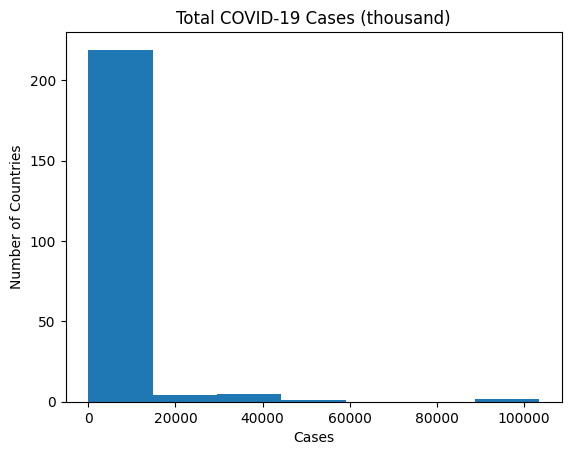

In [37]:
plt.hist(covidtotalsonly['total_cases']/1000, bins=7)
plt.title("Total COVID-19 Cases (thousand)")
plt.xlabel('Cases')
plt.ylabel("Number of Countries")
plt.show()

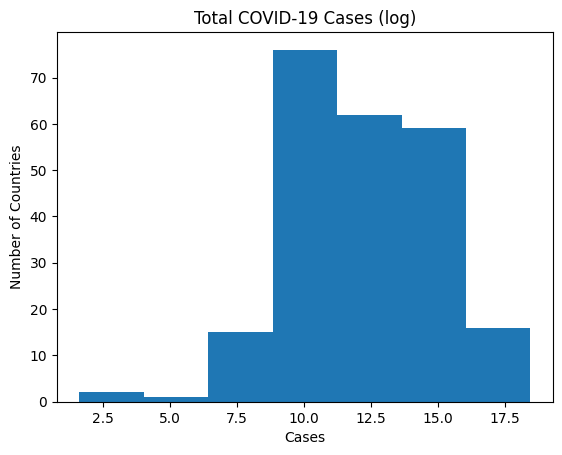

In [38]:
covidlogs = covidtotalsonly.copy()
for col in covidlogs.columns[1:]:
    covidlogs[col] = np.log1p(covidlogs[col])

plt.hist(covidlogs['total_cases'], bins=7)
plt.title("Total COVID-19 Cases (log)")
plt.xlabel('Cases')
plt.ylabel("Number of Countries")
plt.show()